##  <font color = red><center>SMS Spam Detection</center></font> 

In [243]:
#mporting reuired libraries
import numpy as np
import pandas as pd

In [244]:
#loading dataset 
df = pd.read_csv("spam.csv", encoding = 'ISO-8859-1')

In [245]:
df.sample(5) #Checking data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4714,ham,S:)8 min to go for lunch:),NaN,NaN,NaN
4104,ham,Jus finish my lunch on my way home lor... I to...,NaN,NaN,NaN
1635,ham,You have come into my life and brought the sun...,NaN,NaN,NaN
3706,ham,Aight do you still want to get money,NaN,NaN,NaN
3770,ham,"Hi, wlcome back, did wonder if you got eaten b...",NaN,NaN,NaN


In [246]:
df.shape #To know the size of dataset

(5572, 5)

## Data Cleaning

In [247]:
df.info()   #Checking null values and other parameters to perform necessary data cleaning steps

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We have very few 50,12 & 6 rows in Unnames: 2,Unnames: 3,Unnames: 4, columns and remaining all are null rows so better to drop them as they don't contain any data 

In [248]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)       #droping the unnecessary columns

In [249]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


The column names v1 and v2 are not readable i.e, they do not specify anything that we can understand about the data so let's rename the columns

In [250]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace = True) #Renaming columns

In [251]:
df.head() #Verifying our steps

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [252]:
df['Target'].value_counts()     #Checking the type of data stored in Target variable

Target
ham     4825
spam     747
Name: count, dtype: int64

Since we have the textual data in our Target variable it may not be very efficient in data processing so let's convert it into numerical data as 0's and 1's

In [253]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [254]:
df['Target'] = encoder.fit_transform(df['Target'])    

In [255]:
df.head(5)   #Verifying our steps

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Ham = 0 and Spam = 1

In [256]:
df.isnull().sum()    #Checking null values again

Target    0
Text      0
dtype: int64

In [257]:
df.duplicated().sum() #Checking duplicate data

403

we have duplicate data but in less number so dropping it may not effect our output

In [258]:
df = df.drop_duplicates(keep='first')   #Dropping duplicate data by keeping the first occurence 

In [259]:
df.duplicated().sum() #Verifying our steps

0

In [260]:
df.shape  #Verifying our steps

(5169, 2)

Data cleaning is performed on the data with necessary steps

## EDA(Exploratory Data Analysis)

In [261]:
df['Target'].value_counts()      #Checking Target column data

Target
0    4516
1     653
Name: count, dtype: int64

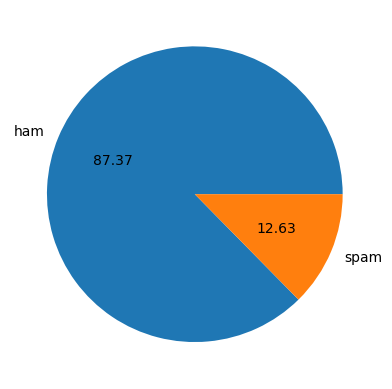

In [262]:
#A pie chart to visualize the data
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

87% of our data contains ham messages and only 12% data contains spam messages which shows that data is highly imbalanced

<b>Let's create three additional cloumns to know the count of characters, words, and sentences in each message which will help in analyzig the data in better way</b>

In [263]:
df['Msg_characters']=df['Text'].apply(len)      #Length of characters in each message 

In [266]:
df.head()  #Verifying our steps

,Target,Text,Msg_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [267]:
#importing nltk and punk package widely used for tokenizing
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\My\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [268]:
df['Word_count'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x))) #A lambda function to count words using word tokenizer

In [269]:
df.head() #Verifying our steps

,Target,Text,Msg_characters,Word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [270]:
# Function to count sentences in each row of a specific column
df['Sentence_Count'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [271]:
df.head() #Verifying our steps

,Target,Text,Msg_characters,Word_count,Sentence_Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [272]:
df[['Msg_characters','Word_count','Sentence_Count']].describe()  #To know the overall range of data

,Msg_characters,Word_count,Sentence_Count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


By this, we can observe that there are 910 max characters, 220 max words and 38 max sentences and in similar way average characters are 78 and average words are 18 and 1 sentence 

In [273]:
#Analysing the ham messages
df[df['Target'] == 0].describe()

,Target,Msg_characters,Word_count,Sentence_Count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [275]:
#Analysing spam messages
df[df['Target'] == 1][['Msg_characters','Word_count','Sentence_Count']].describe()

,Msg_characters,Word_count,Sentence_Count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


By observing these two tables we see that spam messages have more number os characters,words and sentences compared to the ham messages 

In [276]:
#importing seaborn for better understanding of data distribution
import seaborn as sns

<Axes: xlabel='Msg_characters', ylabel='Count'>

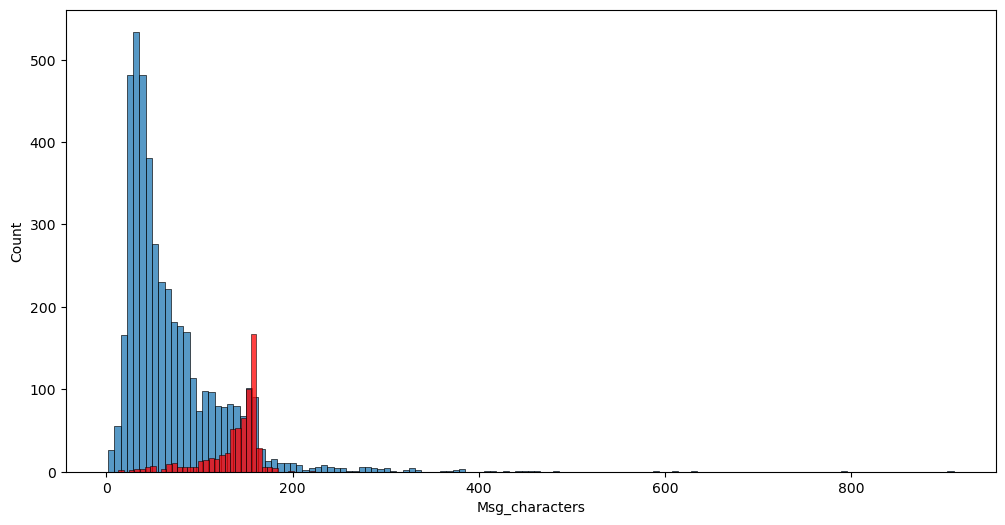

In [277]:
#Plotting a histogram for Message characters in ham and spam messages
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['Msg_characters'])
sns.histplot(df[df['Target'] == 1]['Msg_characters'],color = 'red')

<Axes: xlabel='Word_count', ylabel='Count'>

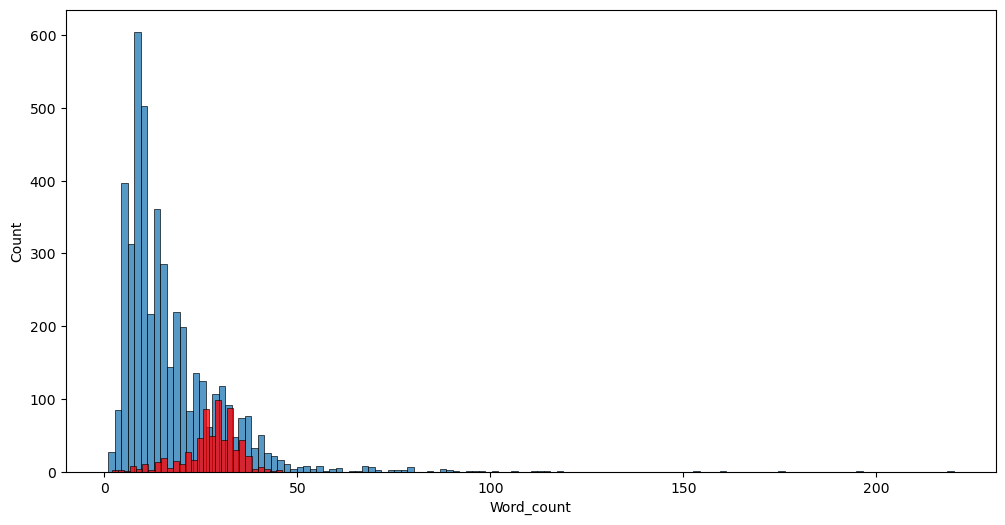

In [278]:
#Plotting a histogram for Message characters in ham and spam messages
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['Word_count'])
sns.histplot(df[df['Target'] == 1]['Word_count'],color = 'red')

These two graphs also depicts the same that spam messages contain more data than ham messages

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


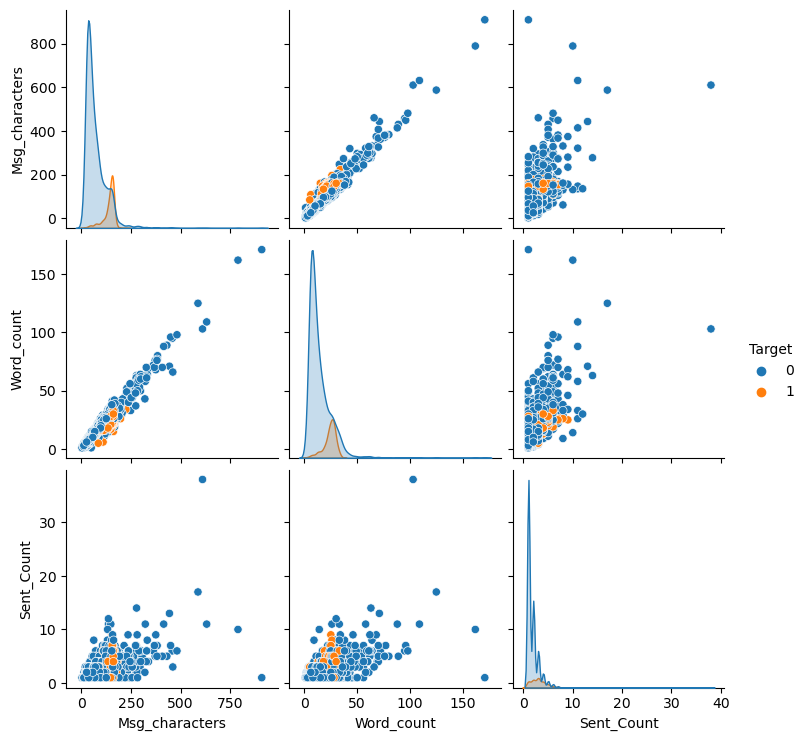

In [95]:
sns.pairplot(df,hue='Target')

This pair grid shows that our data contains some outliers depicst the relation among the three features of ham and spam messages

  ## Data Preprocessing

<b>Lower Case</b> 
<br></br>
<b>Tokenization</b><br></br>
<b>Removing special characters</b><br></br>
<b>Removing stop words and punctuation</b><br></br>
<b>Stemming</b><br></br>
<br></br>
<br></br>

In [279]:
#importing nltk 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\My\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [280]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [281]:
#Function that performs all the steps of text preprocessing
def data_transform(text):
        #Converting text into strings
    text = text.lower()
    text = nltk.word_tokenize(text)
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
        #For removing stop words
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
        #Applying stemming on the data
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [282]:
#Creates another column for the transformed data
df['Transformed_text'] = df['Text'].apply(data_transform)

In [283]:
df.head() #verifying our steps

,Target,Text,Msg_characters,Word_count,Sentence_Count,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


<b>Let's check the most common occuring words in ham and spam messages using word cloud</b>

In [284]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [285]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))

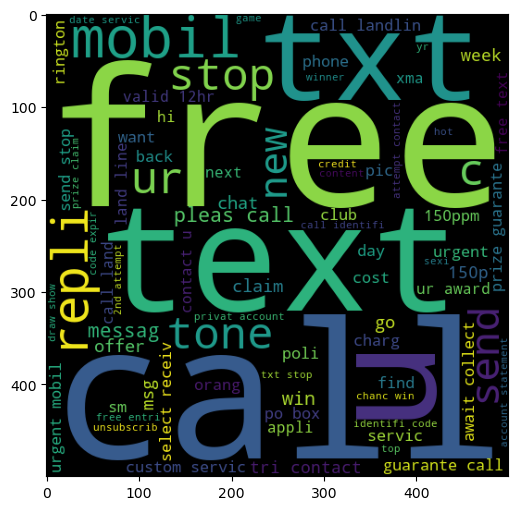

In [286]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [287]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))

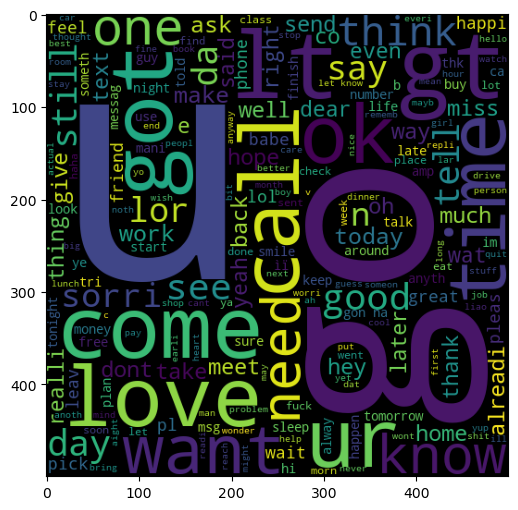

In [288]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

<b>Now Let's look at the top most repiting words in the two categories of messages(although it is obserrved through word cloud</b>

In [289]:
#Creating an empty list that stores the most common words
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [290]:
len(spam_corpus)  #Length of total spam corpus

9939

In [291]:
from collections import Counter

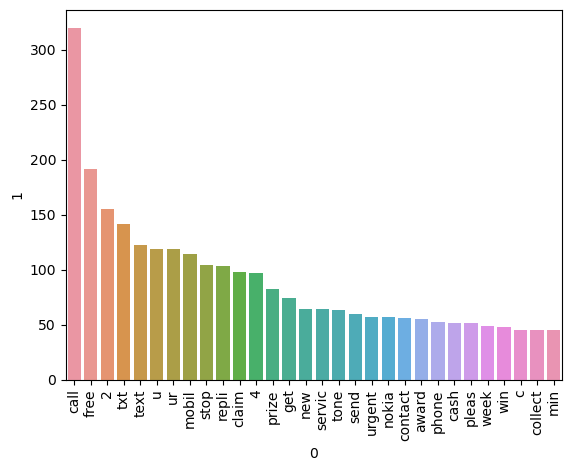

In [293]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

These are the words that are most likely to occur in the spam messages

<b>Performing the same steps for ham messages</b>

In [294]:
ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [295]:
len(ham_corpus)

35404

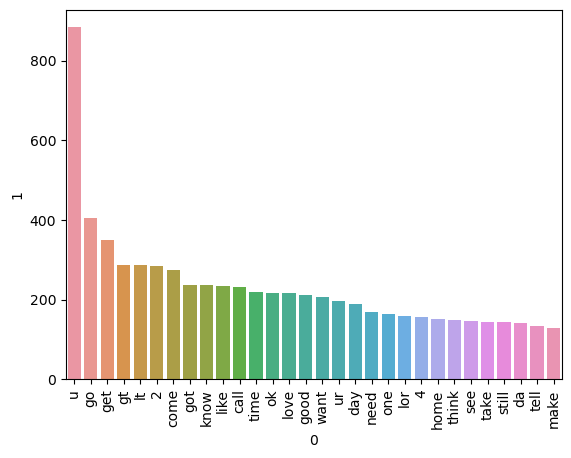

In [296]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

By performing EDA we got a better understanding of our data 

<b>Now, let's build the model with the understanding we have gained till here</b>

## Model Building

In [297]:
#importing CountVectorizer which is needed for the process of model building to convert textual data into numeric data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [299]:
X = cv.fit_transform(df['Transformed_text']).toarray() #Passing the transformed text as input

In [300]:
X.shape     #Shape of vectors

(5169, 6708)

In [301]:
y = df['Target'].values

In [302]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [303]:
#importing train and test split from model selection
from sklearn.model_selection import train_test_split

In [305]:
#80% of the data is used for traing and 20% data is taken for the testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) 

In [306]:
#Starting with naive bayes as it usually performs well on textual data
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB     #importing the three variations of naive bayes
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score       #importing the measuring factors

In [307]:
#creating objects
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [308]:
#Training and testing the data with Gaussian Naive Bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))   
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


It did not perform well on our data (poor results)

In [312]:
#Training and testing the data with Multinomial Naive Bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))  
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) 

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


Better than gaussian naive bayes but is not a good model for our data


Accuracy is much improved but we need high precision score as the data is highly imbalanced precision score will be a perfect measure than accuracy. So we need to focus on increasing our precision score

In [313]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))   #Best performance
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Here both are better then the previous two results so till now bernoulli naive bayes is considered as the best model

<b>Let's try different procedures on the data for a better performance of model as we didn't get the highest precision score yet</b>

In [314]:
#Trying with TfidVectorizer instead of countVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

Performing the same steps 

In [315]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [316]:
X.shape

(5169, 6708)

In [317]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [318]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [319]:
gnb1.fit(X_train,y_train)
y_pred1 = gnb1.predict(X_test)
print(accuracy_score(y_test,y_pred1))   
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


This result is not improved

In [321]:
mnb1.fit(X_train,y_train)
y_pred2 = mnb1.predict(X_test)
print(accuracy_score(y_test,y_pred2))   
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


Here accuracy is little less but as we are focusing on precision score we got the highest as 100% which is the best score

<b>Now we can either go with bernouli naive bayes or multinomial naive bayes with tfidf </b>
<br></br> <b>   Since multinomial is giving the best precision we will go with this  tfidf --> mnb </b>

In [322]:
#importing the three algorithms to test our data with highest performance
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [323]:
#creating objects
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)

In [324]:
#creating a dictionary for the models
clfs = {
    'KN' : knc,
    'NB' : mnb,
    'RF' : rfc,
}

In [325]:
#A simple function for traing and testing the data with three models simulatneously for parallel comparision of their results
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [326]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


In [328]:
#creating a dataframe with to store the three models with their results by sorting them with precision
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [329]:
performance_df

,Algorithm,Accuracy,Precision
2,RF,0.971954,1.0
1,NB,0.959381,1.0
0,KN,0.900387,1.0


In this single dataframe we can see that all three are giving the max precision score so we can consider as the accuracy score as the deciding feature of our algortihm and that is Random Forest with 97% accuracy and 100% precision

<b> We can further improve the algorithm by modifying the max_features, scaling , stacking methods but as we got our desired output we can also end here by considerng as Random Forest as the best performing model on our data </b>

<b>The three main steps involved in builing a model or testing a message to be spam or not are :</b> <br></br>
<b>1) Data preprocessing
2) vectorizing
3) Applying algorithm </b>

# <font color = blue><center>Thank You</center> </font>